In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')
print(df.head())

    age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1


In [3]:
# decide the x and y
x = df.drop(['test_result'], axis=1)
y = df['test_result']

In [4]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

#### SVM model

In [5]:
from sklearn.svm import SVC

# create the model 
model = SVC(C=2.0)

# train the model
model.fit(x_train, y_train)

SVC(C=2.0)

#### Evaluation

In [6]:
# predict the values
y_prediction = model.predict(x_test)
# print(y_prediction)

In [7]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[339  54]
 [ 21 586]]


In [8]:
# accuracy
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 92.50 %


In [9]:
# classsification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       393
           1       0.92      0.97      0.94       607

    accuracy                           0.93      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.93      0.93      0.92      1000



In [10]:
# RoC score
from sklearn.metrics import roc_auc_score

print(f"roc auc score = {roc_auc_score(y_test, y_prediction)}")

roc auc score = 0.9139995221147679


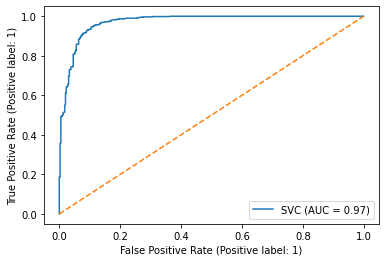

In [11]:
# AuC 
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle="--")